In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("Sample_clusterin_gruppy_per_energy.csv")
del df['genere']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              923 non-null    object 
 1   duration_ms       923 non-null    int64  
 2   explicit          923 non-null    int64  
 3   popularity        923 non-null    int64  
 4   artists           923 non-null    object 
 5   album_name        923 non-null    object 
 6   danceability      923 non-null    float64
 7   energy            923 non-null    float64
 8   key               923 non-null    int64  
 9   loudness          923 non-null    float64
 10  mode              923 non-null    float64
 11  speechiness       923 non-null    float64
 12  acousticness      923 non-null    float64
 13  instrumentalness  923 non-null    float64
 14  liveness          923 non-null    float64
 15  valence           923 non-null    float64
 16  tempo             923 non-null    float64
 1

### Preparation of training data


In [5]:
energy_loudness = df.drop(['name','duration_ms','explicit','popularity','artists','album_name','danceability','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','genre'], axis=1)
energy_loudness.head()

,energy,loudness,gruppo_energy
0,0.459,-6.737,2
1,0.520,-5.234,3
2,0.480,-8.014,1
3,0.916,-4.845,2
4,0.109,-18.657,1


In [6]:
X = energy_loudness.values
energy_loudness.head()

,energy,loudness,gruppo_energy
0,0.459,-6.737,2
1,0.520,-5.234,3
2,0.480,-8.014,1
3,0.916,-4.845,2
4,0.109,-18.657,1


### Normalization

In [7]:
# z-score, fit and then transform
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [8]:
# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

### Hierarchical clustering

#### Funtion definition

In [9]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

#### Model fitting

In [10]:
# setting distance_threshold=0 ensures we compute the full tree.
# it is the linkage distance threshold above which clusters will not be merged
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='complete')
model = model.fit(X_minmax)

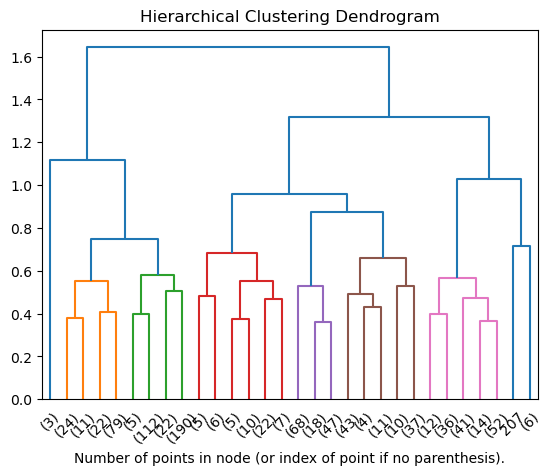

In [11]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=0.7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [12]:
# get the labels according to a specific threshold value cut
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=1.2, criterion='distance')

In [13]:
labels

array([2, 1, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1,
       1, 1, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       3, 3, 3, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2,
       2, 1, 3, 3, 1, 1, 3, 1, 1, 2, 2, 3, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 3, 2, 3, 1,
       1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 3, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 2, 2, 1, 3,
       1, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 3, 1, 2, 3, 1, 3, 1, 2, 1, 1, 2, 3, 1,

In [14]:
print('Silhouette', silhouette_score(energy_loudness, labels))

Silhouette 0.16909818139679206


### Choosing the number of clusters

In [15]:
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

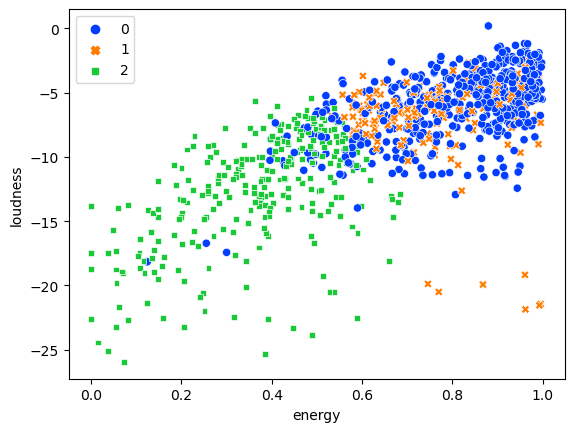

In [16]:
sns.scatterplot(data=energy_loudness, 
                x="energy", 
                y="loudness", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

#### connectivity constraint

In [17]:
# hierarchical clustering
# Compute the (weighted) graph of k-Neighbors for points in X
connectivity = kneighbors_graph(X_minmax, n_neighbors=100, include_self=False)

In [18]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, 
                                n_clusters=None, 
                                metric='euclidean', 
                                linkage='ward', 
                                connectivity=connectivity)
                                
# connecet: Defines for each sample the neighboring 
# samples following a given structure of the data.

model = model.fit(X_minmax)

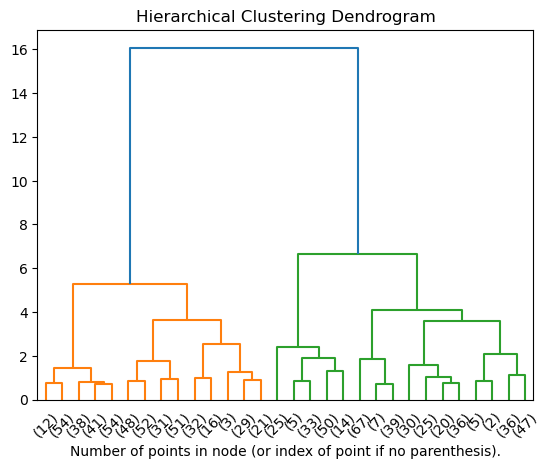

In [19]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [20]:
ward = AgglomerativeClustering(n_clusters=3, 
                               linkage='ward', 
                               metric='euclidean',
                               connectivity=connectivity)
ward.fit(X_minmax)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_minmax, ward.labels_))

labels {0: 482, 1: 314, 2: 127}
silhouette 0.4360230091695381


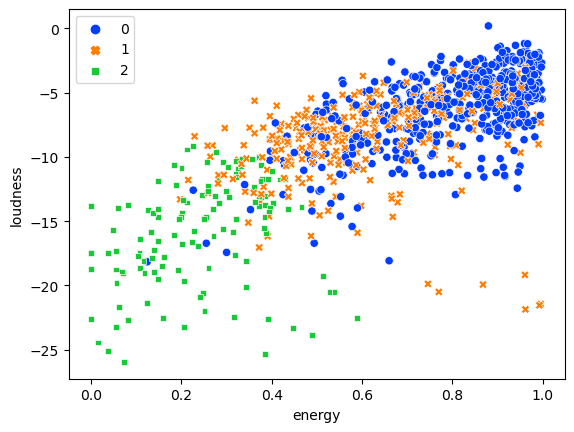

In [21]:
sns.scatterplot(data=energy_loudness, 
                x="energy", 
                y="loudness", 
                hue=ward.labels_, 
                style=ward.labels_, 
                palette="bright")
plt.show()

In [22]:
print('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average', metric='manhattan',  connectivity=connectivity)
average_linkage.fit(X_minmax)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_minmax, average_linkage.labels_))

average linkage
labels {0: 14, 1: 3, 2: 906}
silhouette 0.15068765290773037


In [23]:
print('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='l1', connectivity=connectivity)
complete_linkage.fit(X_minmax)

hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_minmax, complete_linkage.labels_))

complete linkage
labels {0: 40, 1: 858, 2: 25}
silhouette 0.26880954931325723
